<a href="https://colab.research.google.com/github/golderalex6/project/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
if os.path.exists('project'):
    print('You already have the folder!!')
else:
    !git clone https://github.com/golderalex6/project.git
    !ls /content/project/
    !unzip /content/project/Data.zip

Cloning into 'project'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (35/35), 44.32 MiB | 26.20 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Data.tar.gz  Data.zip  Main.ipynb  Processing_US_Data.ipynb  Processing_VN_Data.ipynb
Archive:  /content/project/Data.zip
  inflating: us_data/covid19-us(main).csv  
  inflating: us_data/covid19-us(reserve).csv  
  inflating: us_data/state-acronym.csv  
  inflating: us_data/us-state-areas.csv  
  inflating: us_data/us-state-population.xlsx  
   creating: vietnam_data/.ipynb_checkpoints/
  inflating: vietnam_data/.ipynb_checkpoints/tinh_thanh-checkpoint.txt  
  inflating: vietnam_data/cities-area.xlsx  
  inflating: vietnam_data/cities-population.xlsx  
  inflating: vietnam_data/covid19-vn(main).csv  
  inflating: vietnam_data/covid19-vn(main).ods  
  inflating: vietn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import *
from matplotlib.ticker import FuncFormatter

%run /content/project/Processing_US_Data.ipynb
%run /content/project/Processing_VN_Data.ipynb

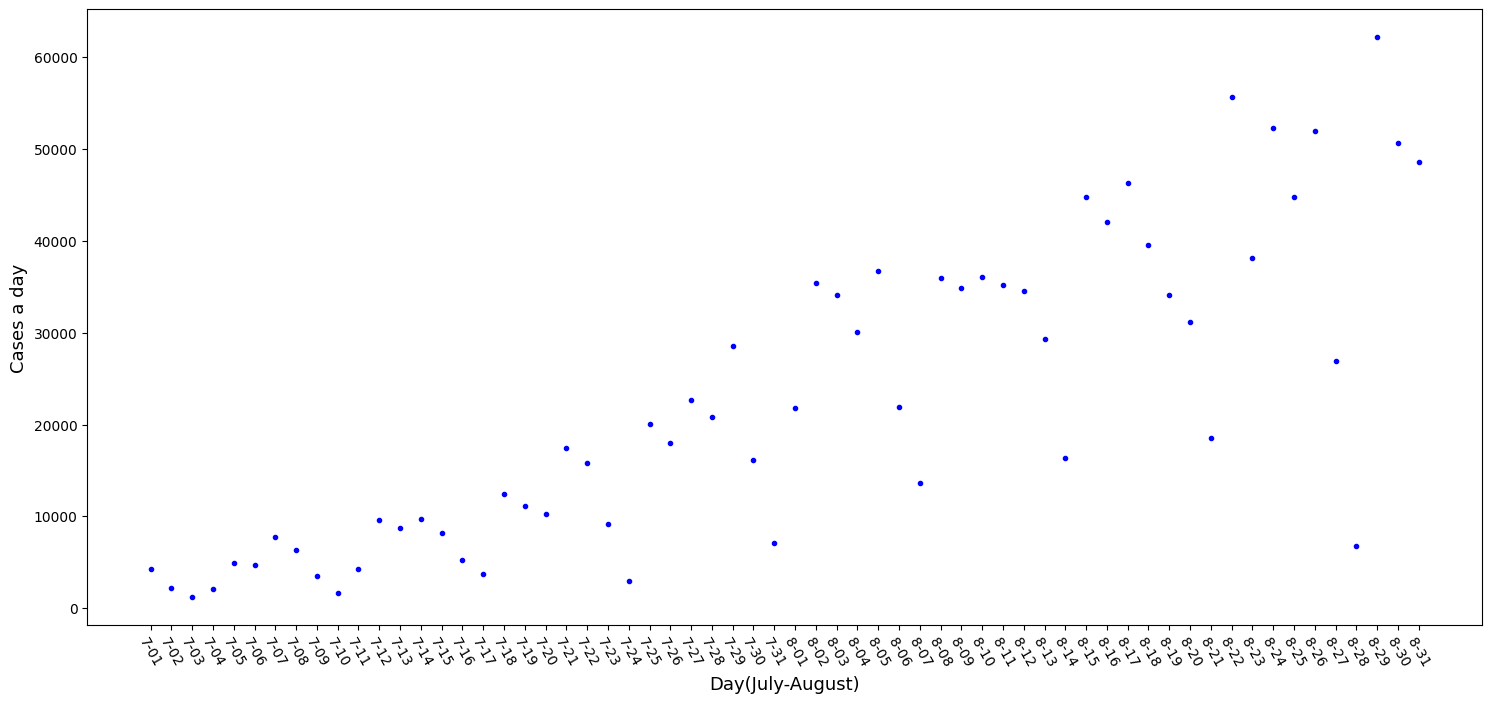

In [64]:
#1.
descriptive=us_day_2m.sum().describe()
mean=descriptive['mean']#mean
std=descriptive['std']#standard deviation
median=descriptive['50%']#median
q1=descriptive['25%']#Q1
q3=descriptive['75%']#Q3
max=descriptive['max']#Max
min=descriptive['min']#Min
range=max-min#Range
day=list(map(lambda x:x[6:],list(us_day_2m.sum().index)))
case=list(us_day_2m.sum().values)
plt.figure(figsize=(18,8))
plt.plot(day,case,'b.')
plt.xticks(rotation=-60)
plt.xlabel('Day(July-August)',fontsize=13)
plt.ylabel('Cases a day',fontsize=13)
plt.show()#Draw

In [10]:
#2.
t_025_61=1.99962#https://shorturl.at/JNVZ4
h0=24000
n=62

mean_2m=us_day_2m.sum().mean()#mean

std=us_day_2m.sum().std()#standard deviation

t0=(mean_2m-h0)*sqrt(n)/std#test statitic

CI=(mean_2m-t_025_61*std/sqrt(n),mean_2m+t_025_61*std/sqrt(n))#confidence interval

mean_2

22761.8064516129

In [5]:
#3.
n=10000
p0=0.015
z_0025=1.96

p=us_case_2m['AVG_case_per1000'].sum()/n#propotion

z0=(p-p0)/sqrt(p0*(1-p0)/n)#test statitic

CI=(p-z_0025*sqrt(p*(1-p)/n),p+z_0025*sqrt(p*(1-p)/n))#confident interval

CI

(0.011362006535029858, 0.01590804230279001)

In [ ]:
#4.
#formula link:https://shorturl.at/dgLX4
n_vn=n_us=62
us_day_2m
vn_day_2m
delta=-10000

mean_us=us_day_2m.sum().mean()#US sample mean

std_us=us_day_2m.sum().std()#US sample standard deviation

mean_vn=vn_day_2m.sum().mean()#Viet Nam sample mean

std_vn=vn_day_2m.sum().std()#Viet Nam sample standard deviation

degree_of_freedom=(std_vn**2/n_vn+std_us**2/n_us)**2/(std_vn**4/((n_vn-1)*n_vn**2)+std_us**4/((n_us-1)*n_us**2))#degree of freedom

t_025_dr=1.99962

t0=(mean_vn-mean_us-delta)/sqrt((std_us**2+std_vn**2)/n_vn)#Test hypothesis
degree_of_freedom

61.00105267838273

In [ ]:
#5.
n=10000
delta_p=-0.012

p_us=us_case_2m['AVG_case_per1000'].sum()/n#propotion of US

p_vn=vn_case_2m['AVG_case_per1000'].sum()/n#propotion of Viet Nam

pooled_p=(us_case_2m['AVG_case_per1000'].sum()+vn_case_2m['AVG_case_per1000'].sum())/(2*n)#pooled propotion

z0=(p_vn-p_us-delta_p)/sqrt(2*pooled_p*(1-pooled_p)/n)#test statitic
z0

-0.8847248553667835

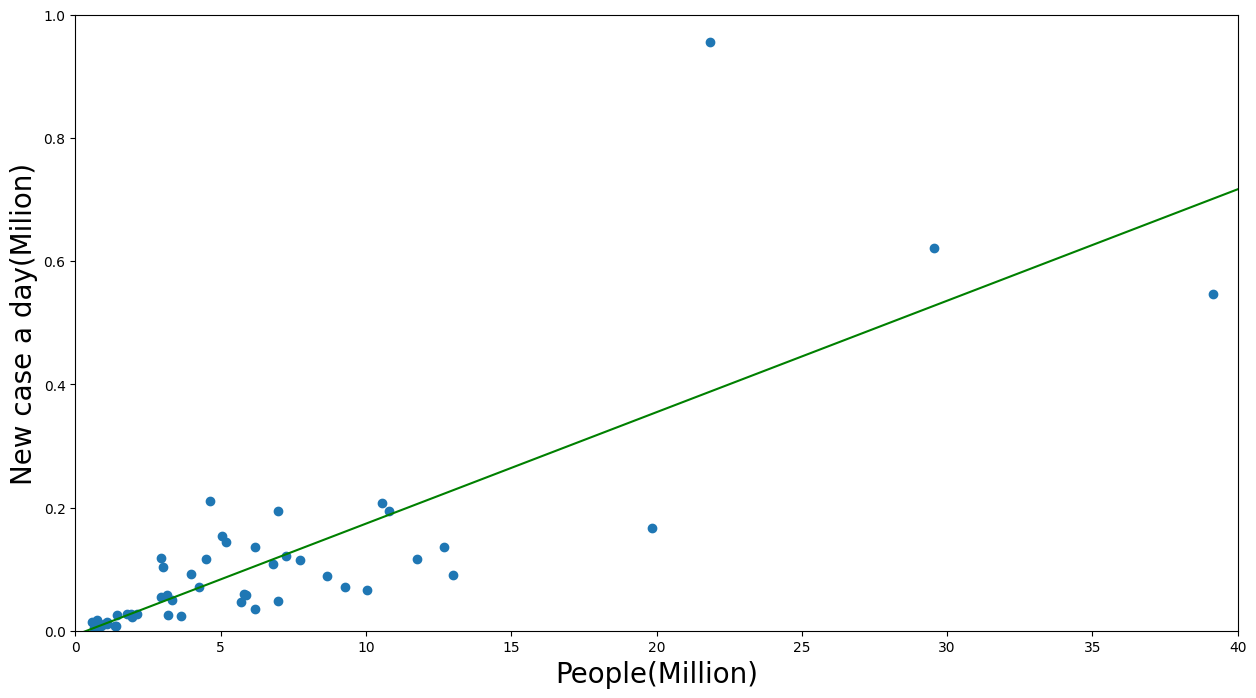

In [7]:
#6.
mean_y=us_case_2m_people['ncase_th_periods'].sum()/51#mean y

mean_x=us_case_2m_people['population'].sum()/51#mean x

S_xx=((us_case_2m_people['population']-mean_x)**2).sum()#Sxx

S_xy=((us_case_2m_people['population']-mean_x)*(us_case_2m_people['ncase_th_periods']-mean_y)).sum()#Sxy

B1=S_xy/S_xx#B1

B0=mean_y-B1*mean_x#B0
SS_t=((us_case_2m_people['ncase_th_periods']-mean_y)**2).sum()#SSt

R=S_xy/sqrt(S_xx*SS_t)#corelation coefficent

#graph
f=lambda x:x/10**6
x=[0,4*10**7]
y=list(map(lambda x:x*B1+B0,x))
plt.figure(figsize=(15,8))
plt.plot(list(map(f,us_case_2m_people['population'].values)),list(map(f,us_case_2m_people['ncase_th_periods'].values)),marker='.',linestyle='',markersize=12)
plt.plot(list(map(f,x)),list(map(f,y)),color='green')
plt.xlim(0,40)
plt.ylim(0,1)
plt.ylabel('New case a day(Milion)',fontsize=20)
plt.xlabel('People(Million)',fontsize=20)
plt.show()